<center>
    <h1> Ds project </h1>
  
</center>

In [1]:
!pip install -r ..\requirements.txt




[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\91936\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


1.Import data from excel and load it as Dataframe using Pandas

In [2]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)
from src.data.make_dataset import DataLoader


from src.config import DATA_PATH_RAW

# Load Data
dataset = DataLoader(filepath=f"{DATA_PATH_RAW}/sales_data.xlsx")
data = dataset.load_excel()







Data loaded successfully.


2.Perform preprocessing operations as required - check datatypes, null values, etc
3.Save it as pickle object 

In [3]:
# showing the first 5 rows of the dataset:
# Create Features object with the loaded data
from src.features.build_features import Features
from src.config import DATA_PATH_INTERIM
features = Features(data)

# Preprocess data
    
processed_data = features.preprocess()


# Generate and print summary statistics
print(features.generate_summary_statistics())

# Check for missing values
print(features.check_missing_values())

# Print the data types of the columns
print(features.get_data_types())
output_path = os.path.join(DATA_PATH_INTERIM, "data.pkl")
features.save(output_path)

Preprocessing complete.
Data Shape: (113036, 17)
                                Date           Year   Customer_Age  \
count                         113036  113036.000000  113036.000000   
mean   2014-11-23 12:14:55.063519232    2014.401739      35.919212   
min              2011-01-01 00:00:00    2011.000000      17.000000   
25%              2013-12-22 00:00:00    2013.000000      28.000000   
50%              2014-06-27 00:00:00    2014.000000      35.000000   
75%              2016-01-09 00:00:00    2016.000000      43.000000   
max              2016-07-31 00:00:00    2016.000000      87.000000   
std                              NaN       1.272510      11.021936   

       Order_Quantity      Unit_Cost     Unit_Price         Profit  \
count   113036.000000  113036.000000  113036.000000  113036.000000   
mean        11.901660     267.296366     452.938427     285.051665   
min          1.000000       1.000000       2.000000     -30.000000   
25%          2.000000       2.000000    

4.Perform data analysis and visualize them using seaborn/matplotlib\
5.Display Data using visualisations/data analysis. Save the visualizations as a jpg/png for future reference

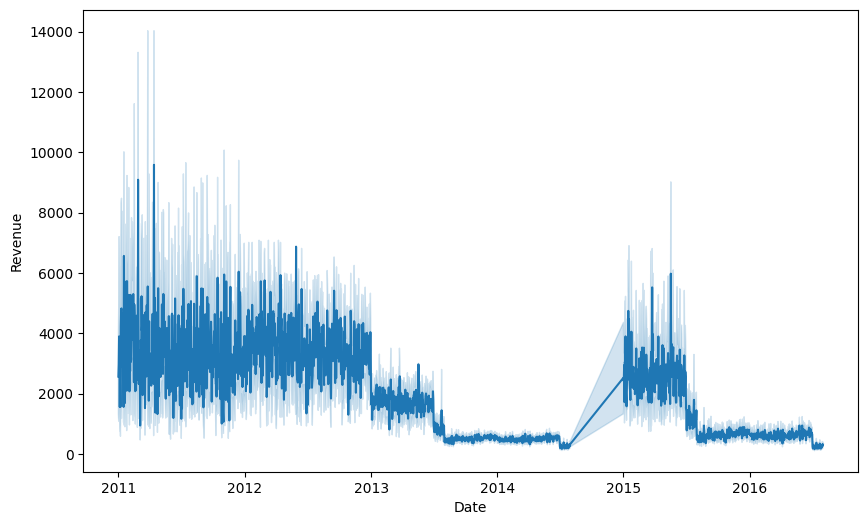

Plot saved to c:\Users\91936\Documents\GitHub\dsproject\entransinterntask\figures/sales_rends.png.


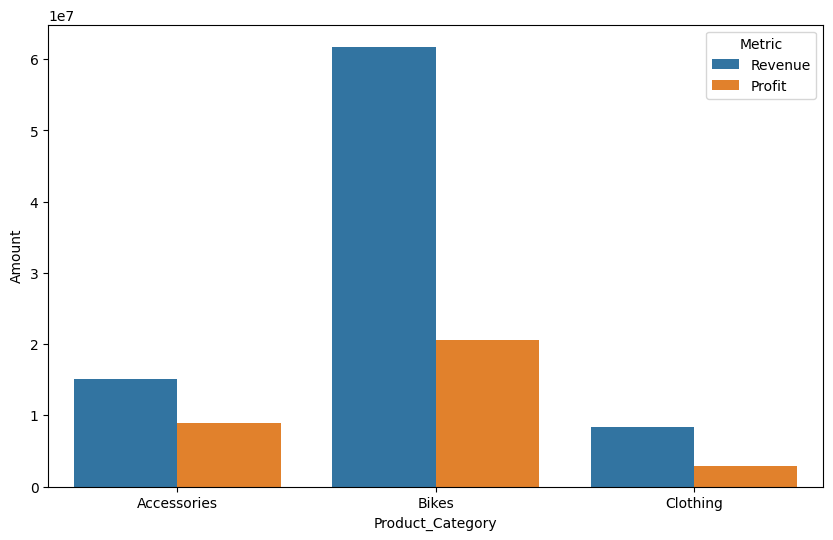

Plot saved to c:\Users\91936\Documents\GitHub\dsproject\entransinterntask\figures/revenue_profit_by_category.png.


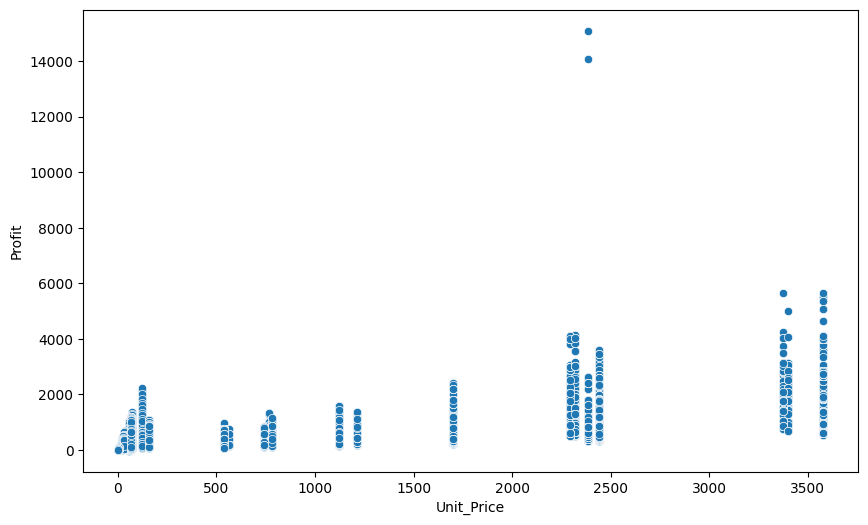

Plot saved to c:\Users\91936\Documents\GitHub\dsproject\entransinterntask\figures/price_vs_profit.png.


In [4]:
from src.visualization.visualize import Plots
from src.config import FIGURES_PATH
plots = Plots(data)

plots.sales_trends(f"{FIGURES_PATH}/sales_rends.png")


plots.revenue_profit_by_product_category(f"{FIGURES_PATH}/revenue_profit_by_category.png")


plots.price_vs_profit(f"{FIGURES_PATH}/price_vs_profit.png")



5.a.Calculate summary statistics (mean, median, etc.) for numeric columns
5.b.Find the total number of Product_Category, Sub_Category, Product

In [5]:
from src.visualization.summary import summary

stats_calculator = summary(data)
# Columns to calculate summary statistics
numeric_columns = ['Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Revenue']

# Calculate and display summary statistics
summary_stats = stats_calculator.summary_statistics(numeric_columns)
for column, stats in summary_stats.items():
    print(f"\nSummary Statistics for {column}:")
    for stat, value in stats.items():
        print(f"{stat}: {value:.2f}")

# Additional insights: Grouping data
grouped_by_country = stats_calculator.group_by_column('Country', 'Revenue')
grouped_by_product_category = stats_calculator.group_by_column('Product_Category', 'Profit')

print("\nTotal Revenue by Country:")
print(grouped_by_country)

print("\nTotal Profit by Product Category:")
print(grouped_by_product_category)
columns_to_check = ['Product_Category', 'Sub_Category', 'Product']

# Count unique values
unique_counts = stats_calculator.count_unique_values(columns_to_check)

# Display results
for column, count in unique_counts.items():
    print(f"Total number of unique values in {column}: {count}")



Summary Statistics for Customer_Age:
Mean: 35.92
Median: 35.00
Min: 17.00
Max: 87.00

Summary Statistics for Order_Quantity:
Mean: 11.90
Median: 10.00
Min: 1.00
Max: 32.00

Summary Statistics for Unit_Cost:
Mean: 267.30
Median: 9.00
Min: 1.00
Max: 2171.00

Summary Statistics for Unit_Price:
Mean: 452.94
Median: 24.00
Min: 2.00
Max: 3578.00

Summary Statistics for Profit:
Mean: 285.05
Median: 101.00
Min: -30.00
Max: 15096.00

Summary Statistics for Revenue:
Mean: 754.37
Median: 223.00
Min: 2.00
Max: 58074.00

Total Revenue by Country:
Country
Australia         21302059
Canada             7935738
France             8432872
Germany            8978596
United Kingdom    10646196
United States     27975547
Name: Revenue, dtype: int64

Total Profit by Product Category:
Product_Category
Accessories     8862377
Bikes          20519276
Clothing        2839447
Name: Profit, dtype: int64
Total number of unique values in Product_Category: 3
Total number of unique values in Sub_Category: 17
Total n


5.c.Create a histogram of Customer_Age to observe the age distribution.


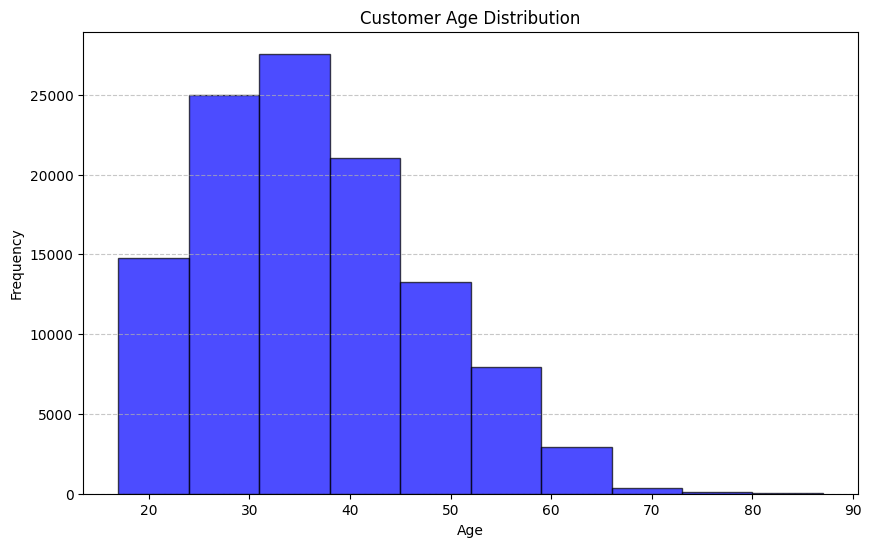

In [6]:
from src.visualization.questioins import Histogram
histogram_plotter = Histogram(data)


histogram_plotter.plot_histogram(
    column='Customer_Age', 
    bins=10, 
    title='Customer Age Distribution', 
    xlabel='Age'
)

5.d. Create 5-subplots in which each subplot is a box plot is a revenue distribution across each age group for a year.


Unique Years in Data: [2013, 2015, 2014, 2016, 2012, 2011]


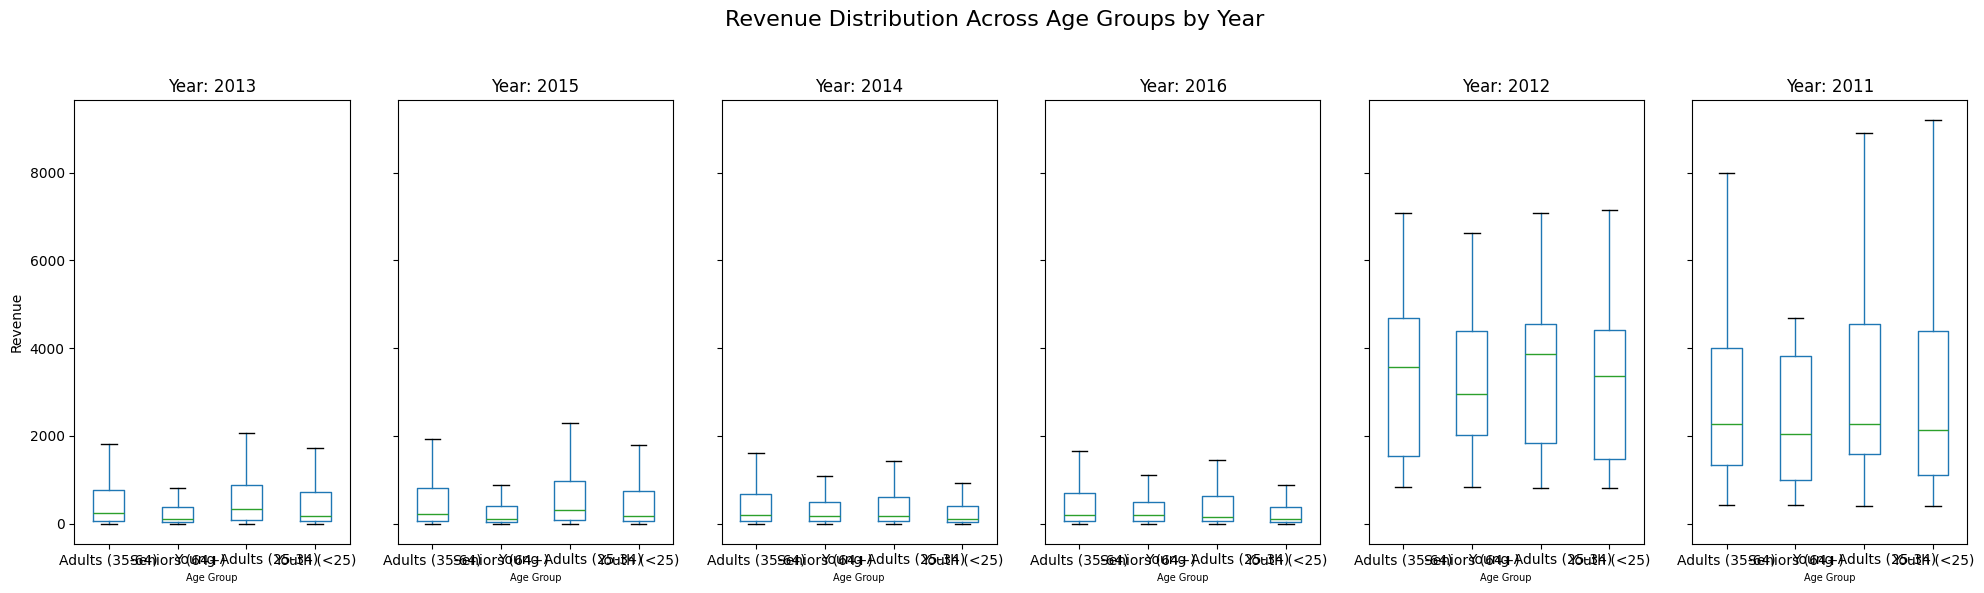

In [7]:
from src.visualization.questioins import Histogram
unique_years = data['Date'].dt.year.unique().tolist()


print("Unique Years in Data:", unique_years)


years_to_plot = unique_years
histogram_plotter.plot_revenue_boxplots(revenue_col='Revenue', age_col='Age_Group', year_col='Year', years=years_to_plot)

5.e.Create a pie chart or bar chart to visualise gender distribution


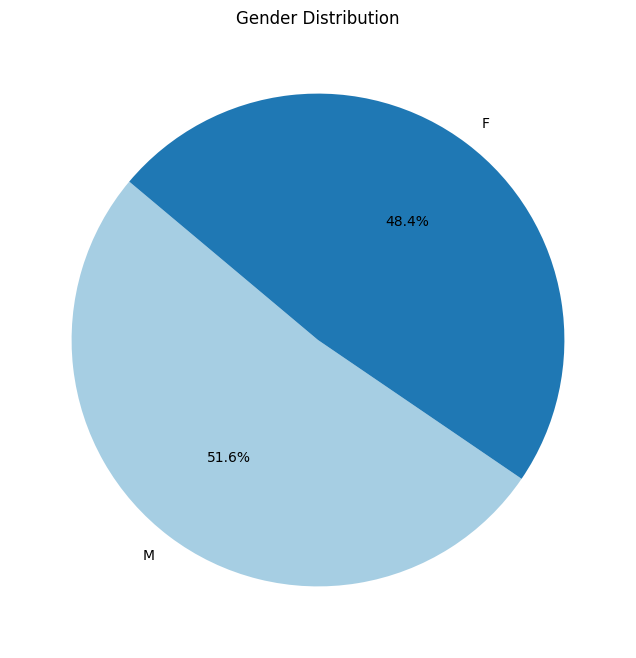

In [8]:
histogram = Histogram(data)

histogram.piechart(column='Customer_Gender', title="Gender Distribution")

5.g.Use a bar chart to show the relationship between Age_Group and Revenue. Find which age group generates the most revenue,
Identify the most and least profitable Product_Category: Group by Product_Category and sum the Profit.Create a horizontal bar chart showing profits by category.

### Product Category and Revenue Analysis ###


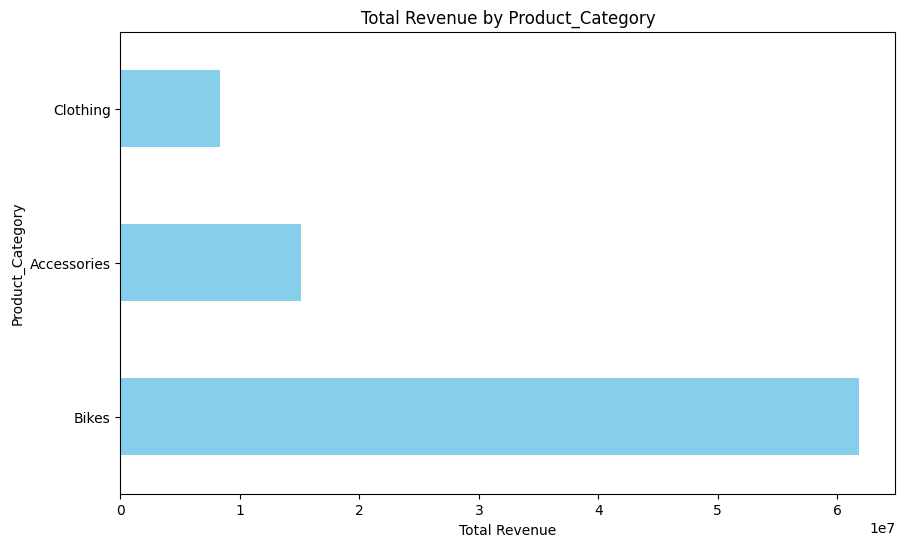

Most profitable product category: Bikes with revenue 61782134
Least profitable product category: Clothing with revenue 8370882

### Age Group and Profit Analysis ###


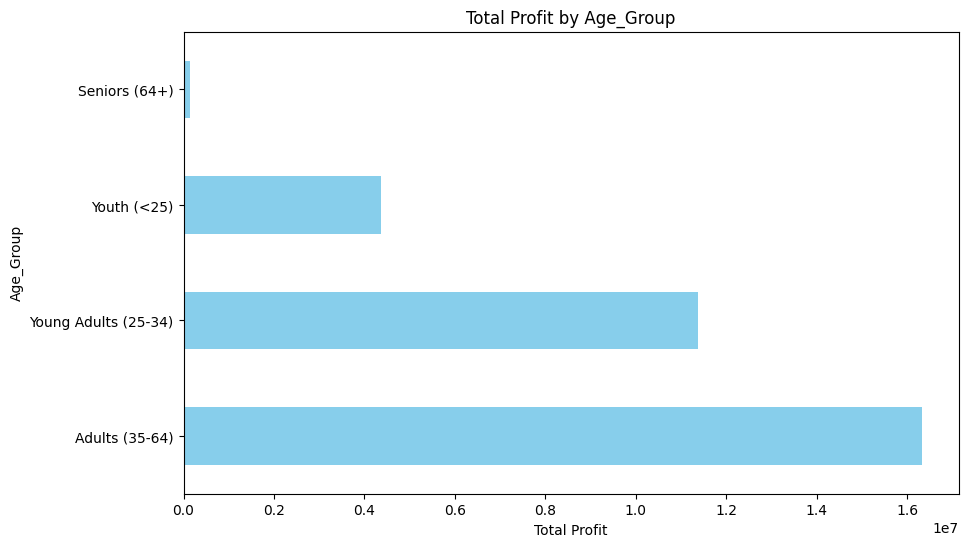

Most profitable age group: Adults (35-64) with profit 16321582
Least profitable age group: Seniors (64+) with profit 138165


In [9]:
from src.visualization.agerevenue import CategoryAnalysisChart


print("### Product Category and Revenue Analysis ###")
product_revenue_chart = CategoryAnalysisChart(data, category_column='Product_Category', numerical_column='Revenue')

# Plot the total revenue by product category
product_revenue_chart.plot_total_by_category()

# Get the most and least profitable product categories
(max_product, max_product_revenue), (min_product, min_product_revenue) = product_revenue_chart.get_max_min_category()

print(f"Most profitable product category: {max_product} with revenue {max_product_revenue}")
print(f"Least profitable product category: {min_product} with revenue {min_product_revenue}")

# 3. Initializing CategoryAnalysisChart for Age Group and Profit
print("\n### Age Group and Profit Analysis ###")
age_profit_chart = CategoryAnalysisChart(data, category_column='Age_Group', numerical_column='Profit')

# Plot the total profit by age group
age_profit_chart.plot_total_by_category()

# Get the most and least profitable age groups
(max_age_group, max_age_profit), (min_age_group, min_age_profit) = age_profit_chart.get_max_min_category()

print(f"Most profitable age group: {max_age_group} with profit {max_age_profit}")
print(f"Least profitable age group: {min_age_group} with profit {min_age_profit}")


5.h.Take user input for start and end month,year. Create a line plot showing revenue and profit trends over each month in this period


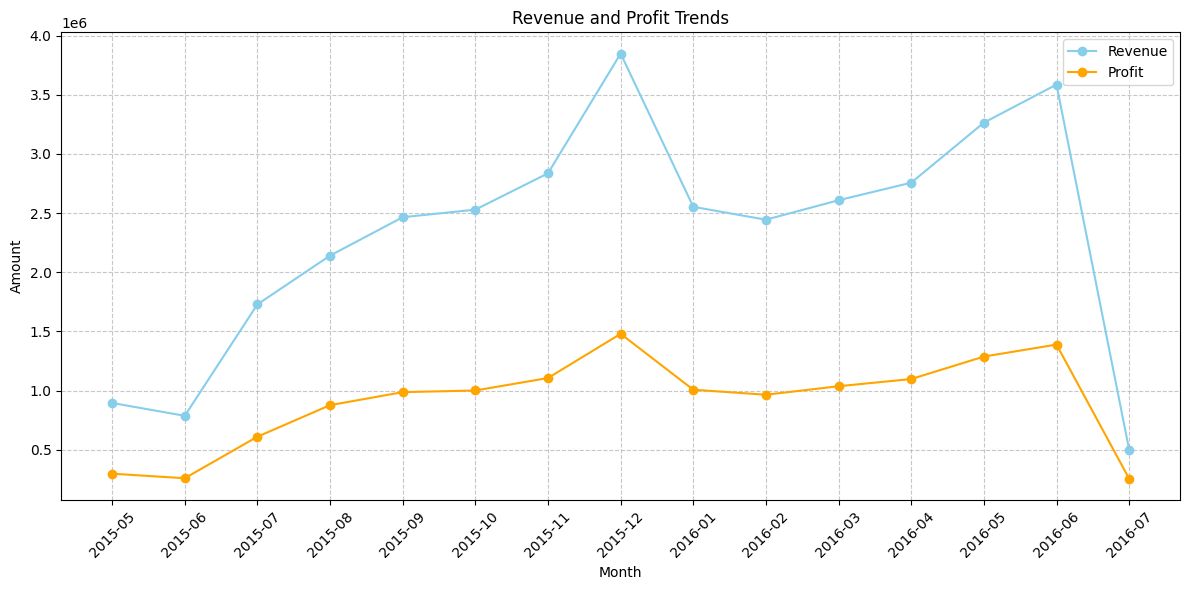


Monthly Revenue and Profit Trends:
           Revenue   Profit
YearMonth                  
2015-05     895043   297294
2015-06     786480   258864
2015-07    1728398   609952
2015-08    2140581   876535
2015-09    2465172   986391
2015-10    2529084  1000619
2015-11    2836222  1105887
2015-12    3848211  1479542
2016-01    2553065  1007073
2016-02    2444190   964594
2016-03    2608663  1036532
2016-04    2756864  1097293
2016-05    3264343  1287165
2016-06    3586300  1388652
2016-07     499960   254639


In [10]:
from src.visualization.profittrends import RevenueProfitTrend

start_month = input("Enter the start month (YYYY-MM): ")
end_month = input("Enter the end month (YYYY-MM): ")

trend_analyzer = RevenueProfitTrend(data)


trends = trend_analyzer.plot_trends(start_date=start_month, end_date=end_month)


print("\nMonthly Revenue and Profit Trends:")
print(trends)

5.i.Calculate the average profit margin per product. Plot using scatter plot
5.j. Plot the above profit margin per product with profit amount. Scatter plot with size of marker as an indicator of profit]


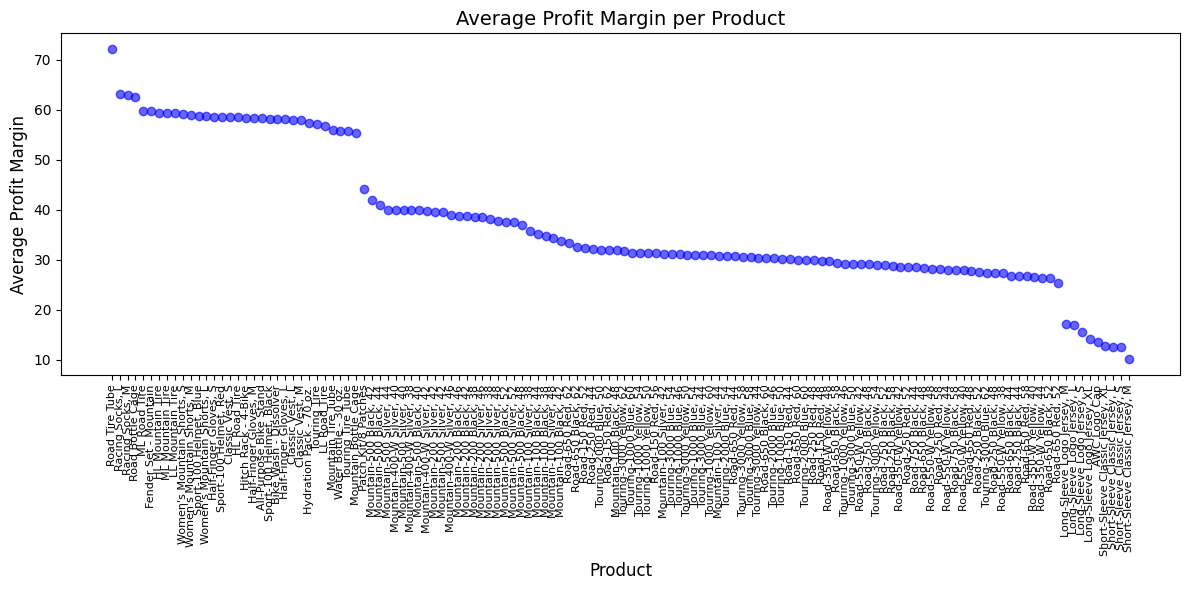

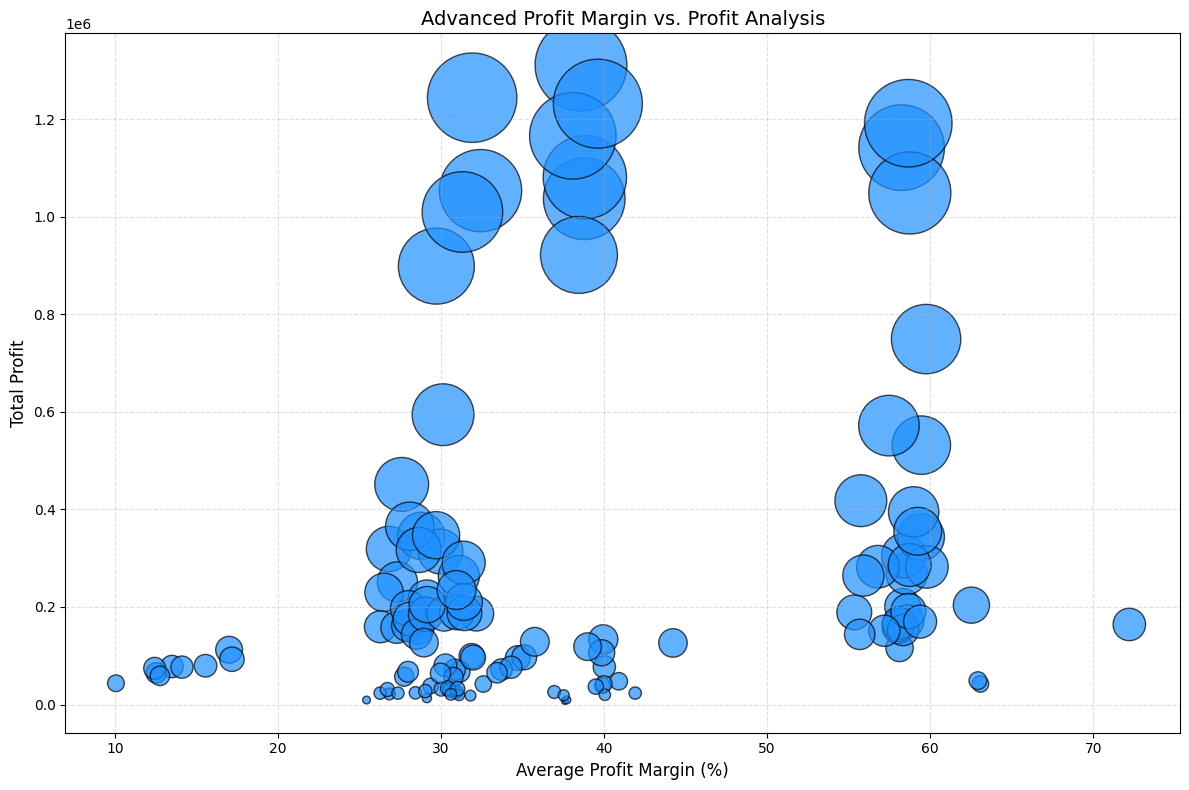

             Product  Profit Margin
56    Road Tire Tube      72.213784
53   Racing Socks, L      63.082929
54   Racing Socks, M      62.926157
55  Road Bottle Cage      62.527055
21      ML Road Tire      59.798882


In [11]:
from src.visualization.profitmargin import AverageProfitMarginAnalysis
margin=AverageProfitMarginAnalysis(data)


avg_profit_margin_df = margin.plot_average_profit_margin()
margin.plot_advanced_profit_margin()


print(avg_profit_margin_df.head())

5.k.Examine which Sub_Category within a Product_Category performs best in terms of Profit or Revenue. Group by Product_Category and Sub_Category to calculate totals. Create a stacked bar chart of revenue/profit by sub-category within categories.

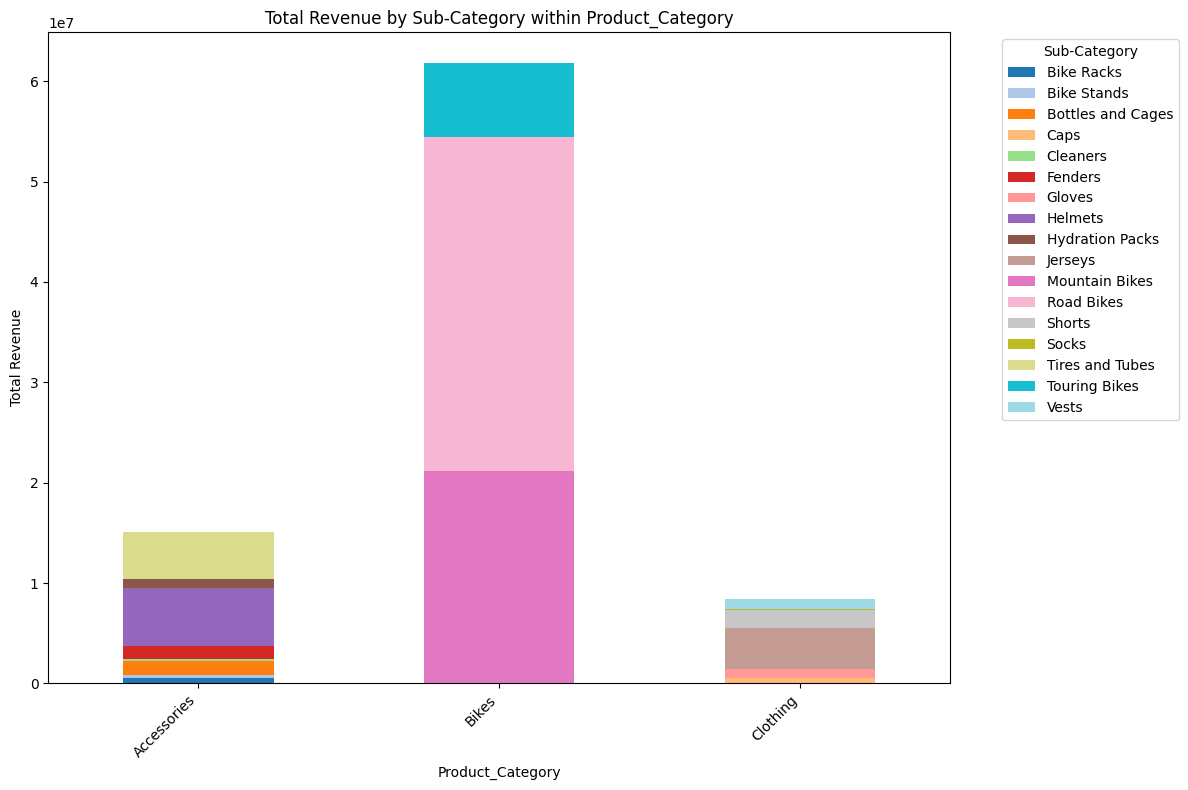

In [12]:
from src.visualization.stackedbarchart import CategoryAnalysisChart
category_analysis = CategoryAnalysisChart(data, category_column='Product_Category', numerical_column='Revenue')


category_analysis.plot_stacked_bar_chart()